In [1]:
import sys
sys.path.append("..")
sys.path.append("../dl")

import torch
import segmentation_models_pytorch as smp
from pytorch_lightning.logging import TestTubeLogger
from pytorch_lightning.callbacks import ModelCheckpoint
from config import conf
from lightning_model import *

/home/leos/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

In [3]:
model = smp.FPN(
    encoder_name="resnext50_32x4d", 
    classes=2, 
    decoder_merge_policy='cat'
)

lightning_model = SegModel.from_conf(model, conf)

In [3]:
tt_logger = TestTubeLogger(
    save_dir=conf['paths']['experiment_root_dir'],
    name=conf['experiment_args']['model_name'],
    version=conf['experiment_args']['experiment_version']
)

checkpoint_dir = (
    Path(tt_logger.save_dir)
    / tt_logger.experiment.name
    / f"version_{tt_logger.experiment.version}"
)

checkpoint_callback = ModelCheckpoint(
    filepath = str(checkpoint_dir),
    save_top_k = 1,
    save_last = True,
    verbose = True, 
    monitor = 'avg_val_loss',
    mode = 'min',
    prefix = ''
)

if conf["training_args"]['resume_training']:   
    last_checkpoint_path = lightning_model.fm.model_checkpoint("last")
    trainer = pl.Trainer(
        default_root_dir=conf['paths']['experiment_root_dir'],
        max_epochs=conf['training_args']['num_epochs'], 
        gpus=conf['training_args']['num_gpus'],  
        logger=tt_logger,
        checkpoint_callback=checkpoint_callback,
        resume_from_checkpoint=str(last_checkpoint_path)
    )
    
else:
    trainer = pl.Trainer(
        default_root_dir=conf['paths']['experiment_root_dir'],
        max_epochs=conf['training_args']['num_epochs'], 
        gpus=conf['training_args']['num_gpus'],  
        logger=tt_logger,
        checkpoint_callback=checkpoint_callback,
    )

/home/leos/.local/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning:

Checkpoint directory ../../results/tests/FPN/version_test_pannuke2 exists and is not empty with save_top_k != 0.All files in this directory will be deleted when a checkpoint is saved!

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
CUDA_VISIBLE_DEVICES: [0]


In [4]:
log_dir = (
    Path(tt_logger.save_dir)
    / tt_logger.experiment.name
    / f"version_{tt_logger.experiment.version}"
    / "tf"
)

In [5]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

/usr/lib/python3.6/subprocess.py:786: ResourceWarning:

subprocess 9314 is still running



In [ ]:
trainer.fit(lightning_model)


  | Name  | Type             | Params
-------------------------------------------
0 | model | FPN              | 25 M  
1 | CE    | CrossEntropyLoss | 0     



Epoch 00000: avg_val_loss reached 0.18927 (best 0.18927), saving model to ../../results/tests/FPN/version_test_pannuke2/epoch=0.ckpt as top 1



Epoch 00001: avg_val_loss reached 0.16149 (best 0.16149), saving model to ../../results/tests/FPN/version_test_pannuke2/epoch=1.ckpt as top 1



Epoch 00002: avg_val_loss reached 0.15166 (best 0.15166), saving model to ../../results/tests/FPN/version_test_pannuke2/epoch=2.ckpt as top 1



Epoch 00003: avg_val_loss reached 0.14324 (best 0.14324), saving model to ../../results/tests/FPN/version_test_pannuke2/epoch=3.ckpt as top 1



Epoch 00004: avg_val_loss reached 0.13993 (best 0.13993), saving model to ../../results/tests/FPN/version_test_pannuke2/epoch=4.ckpt as top 1



Epoch 00005: avg_val_loss  was not in top 1



Epoch 00006: avg_val_loss reached 0.13697 (best 0.13697), saving model to ../../results/tests/FPN/version_test_pannuke2/epoch=6.ckpt as top 1



Epoch 00007: avg_val_loss  was not in top 1



Epoch 00008: avg_val_loss reached 0.13367 (best 0.13367), saving model to ../../results/tests/FPN/version_test_pannuke2/epoch=8.ckpt as top 1



Epoch 00009: avg_val_loss  was not in top 1



Epoch 00010: avg_val_loss  was not in top 1



Epoch 00011: avg_val_loss  was not in top 1



Epoch 00012: avg_val_loss  was not in top 1



Epoch 00013: avg_val_loss  was not in top 1



Epoch 00014: avg_val_loss  was not in top 1



Epoch 00015: avg_val_loss  was not in top 1



Epoch 00016: avg_val_loss  was not in top 1



Epoch 00017: avg_val_loss  was not in top 1



Epoch 00018: avg_val_loss  was not in top 1



Epoch 00019: avg_val_loss  was not in top 1



Epoch 00020: avg_val_loss  was not in top 1



Epoch 00021: avg_val_loss  was not in top 1



Epoch 00022: avg_val_loss  was not in top 1



Epoch 00023: avg_val_loss  was not in top 1



Epoch 00024: avg_val_loss  was not in top 1


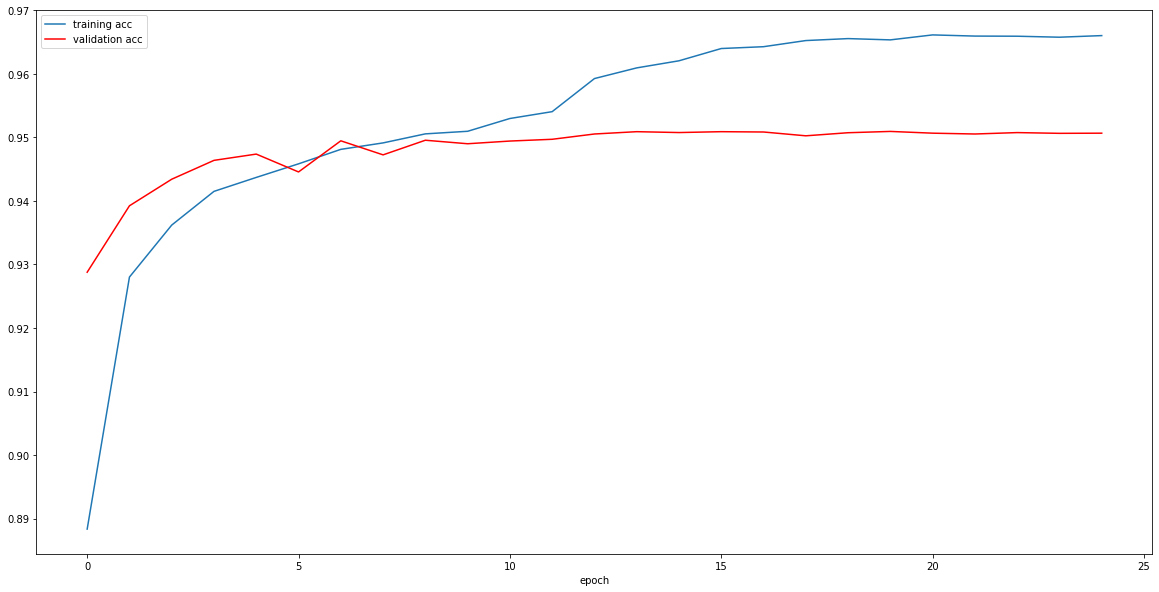

In [4]:
plot_metrics(conf=conf, metric='accuracy', scale='linear', save=True)